1. Stworzenie (pustego) rejestru z parametrami takimi jak układ, którego wynik chcemy poptawić.
2. Tworzymy ,2^n gdzie n to ilość mierzonych kubitów, obwodów kalibracyjnych z których każdy tworzy stan bazowy.
3. Uruchmiamy na wybranym komputerze kwantowym otrzymane stany bazowe.
4. Z otrzymanych wyników tworzymy macierz kalibracji.
5. Uruchamiamy na wybranym wcześniej kompuerze układ którego wynik chcemy poprawić.
6. Wykorzystujemy utworzoną macierz do skyrogowania otrzymanych wcześniej wyników, w celu poprawy jakości wyniku. 


In [2]:
# Import general libraries (needed for functions)
import numpy as np
import time

# Import Qiskit classes
import qiskit 
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.providers.aer import noise
from qiskit.tools.visualization import plot_histogram

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-28 14:43:04,096: Credentials are already in use. The existing account in the session will be replaced.


In [44]:
provider = IBMQ.get_provider(group='open')
backend = Aer.get_backend('qasm_simulator')
backendReal = provider.get_backend('ibmq_burlington')

In [52]:
# 1. Stworzenie (pustego) rejestru z parametrami takimi jak układ, którego wynik chcemy poptawić.
qr = QuantumRegister(3)

In [22]:
# 2. Tworzymy ,2^n gdzie n to ilość mierzonych kubitów, obwodów kalibracyjnych z których każdy 
#tworzy stan bazowy.
qubit_list = [0,1]
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qr, circlabel='mcal')

In [23]:
state_labels

['00', '01', '10', '11']

In [25]:
# 3. Uruchmiamy na wybranym komputerze kwantowym otrzymane stany bazowe.
job = qiskit.execute(meas_calibs, backend=backendReal, shots=1000)
cal_results = job.result()

In [26]:
# 4. Z otrzymanych wyników tworzymy macierz kalibracji.
meas_fitter = CompleteMeasFitter(cal_results, state_labels, qubit_list=qubit_list, circlabel='mcal')
print(meas_fitter.cal_matrix)

[[0.97  0.042 0.042 0.002]
 [0.016 0.944 0.002 0.05 ]
 [0.014 0.    0.943 0.052]
 [0.    0.014 0.013 0.896]]


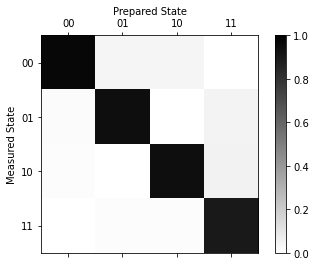

In [27]:
# Plot the calibration matrix
meas_fitter.plot_calibration()

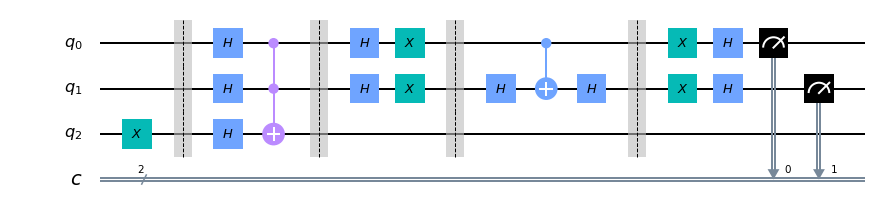

In [28]:
#obwód dla przykładu książkowego
circ = QuantumCircuit(3,2)
circ.x(2)
circ.barrier()
circ.h(0)
circ.h(1)
circ.h(2)

circ.ccx(0,1,2)

circ.barrier()

circ.h(0)
circ.h(1)

circ.x(0)
circ.x(1)

circ.barrier()

circ.h(1)
circ.cx(0,1)
circ.h(1)

circ.barrier()

circ.x(0)
circ.x(1)

circ.h(0)
circ.h(1)

circ.measure(0,0)
circ.measure(1,1)
circ.draw()

In [45]:
# 5. Uruchamiamy na wybranym wcześniej kompuerze układ którego wynik chcemy poprawić.
job = execute(circ, backendReal)
result = job.result()
noisy_counts = result.get_counts()
print(noisy_counts)

{'00': 152, '01': 158, '11': 540, '10': 174}


In [46]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
#6. Wykorzystujemy utworzoną macierz do skyrogowania 
# otrzymanych wcześniej wyników, w celu poprawy jakości wyniku.
mitigated_results = meas_filter.apply(result)
mitigated_counts = mitigated_results.get_counts(0)

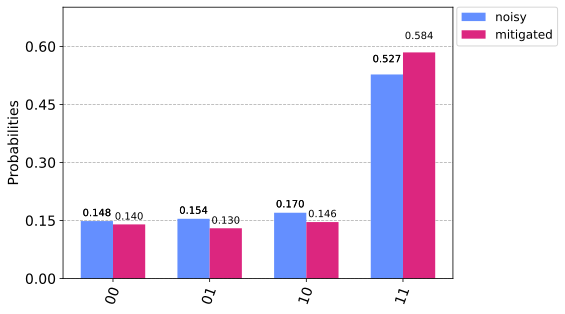

In [47]:
from qiskit.visualization import *
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

In [53]:
# 1. Stworzenie (pustego) rejestru z parametrami takimi jak układ, którego wynik chcemy poptawić.
qr1 = QuantumRegister(2)

In [54]:
# 2. Tworzymy ,2^n gdzie n to ilość mierzonych kubitów, obwodów kalibracyjnych z których każdy 
#tworzy stan bazowy.
qubit_list = [0,1]
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubit_list, qr=qr1, circlabel='mcal')

In [55]:
# 3. Uruchmiamy na wybranym komputerze kwantowym otrzymane stany bazowe.
job = qiskit.execute(meas_calibs, backend=backendReal, shots=1000)
cal_results = job.result()

In [56]:
# 4. Z otrzymanych wyników tworzymy macierz kalibracji.
meas_fitter = CompleteMeasFitter(cal_results, state_labels, qubit_list=qubit_list, circlabel='mcal')

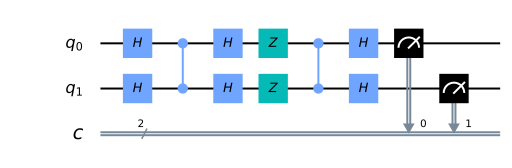

In [57]:
#obwód dla optymalizacja pod IBM
circ1 = QuantumCircuit(2,2)
circ1.h(0)
circ1.h(1)

circ1.cz(0,1)

circ1.h(0)
circ1.h(1)

circ1.z(0)
circ1.z(1)

circ1.cz(0,1)
circ1.h(0)
circ1.h(1)
circ1.measure(0,0)
circ1.measure(1,1)
circ1.draw()

In [58]:
# 5. Uruchamiamy na wybranym wcześniej kompuerze układ którego wynik chcemy poprawić.
job = execute(circ1, backendReal)
result = job.result()
noisy_counts = result.get_counts()
print(noisy_counts)

{'00': 55, '01': 136, '11': 746, '10': 87}


In [59]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
#6. Wykorzystujemy utworzoną macierz do skyrogowania 
# otrzymanych wcześniej wyników, w celu poprawy jakości wyniku.
mitigated_results = meas_filter.apply(result)
mitigated_counts = mitigated_results.get_counts(0)

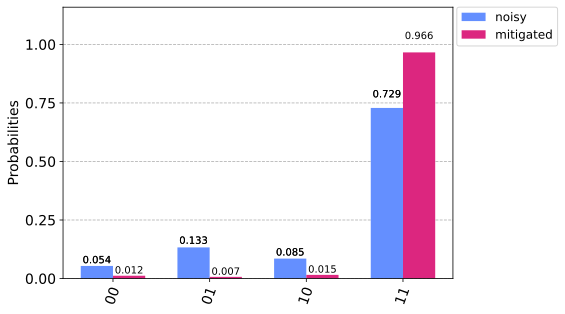

In [60]:
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])

2. Metodę zastosowałem dla ostatnich laboratorium - numer 10 na temat algorytmu Grovera. Metodę zastosowałem dla obu wariantów wcześniejszego laboratorium: dla metody książkowej oraz metody z optymalizacją IBM.

3. Dla obydwóch przykładów z laboratorium na temat algorytmu Grovera można zaobserwować poprawę wyników. W piewszym przypadku jest to prawdopodobieńśtwo większe dla właściwego wyniku o 0.057. W drugim natomiast jest to poprawa aż o 0.267. Poprawa wynika z usunięcią szumów powstających przy samym pomiarze aktualnego stanu kubitów. Mając wartość szumów przy pustym rejestrze oraz przy takim, którego obwód jest wykorzystywany, można się go pozbyć.